# Assignment 2
# Task 2 ：Generate summary statistics
Student name:Wushuo Zhang

Student number: 21212298

In [1]:
import gpxpy
import gpxpy.gpx
import gpxpy.parser as parser
import pandas as pd
import math
import requests
import time
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Loading data

Parsing an existing file:

In [2]:
def read_file(num):
    gpx_file = open('gpx_data/ev'+num+'.gpx', 'r')#Read files
    gpx_parser = parser.GPXParser( gpx_file )
    gpx = gpx_parser.parse()  # files parsing
    gpx_file.close()
    return gpx

In [3]:
gpx = {}
list_name = []
route_name = []
for i in range(1,16):
    list_name.append(str(i))
    route_name.append('EuroVelo '+str(i))
list_name.append('17')
list_name.append('19')
route_name.append('EuroVelo 17')
route_name.append('EuroVelo 19')
for i in list_name:
    gpx['EuroVelo '+i] = read_file(i)

Get information about each point, including latitude, longitude, elevation and the name of the stage：

In [4]:
tracks = {}
tracks_gpx = {}
for i in route_name:
    name = []
    stage_name = []
    latitude_list = []
    longitude_list = []
    elevation_list = []
    tracks_gpx[i] = {}
    count = 0
    for track in gpx[i].tracks:
        tracks_gpx[i][count+1] = track
        for segment in track.segments:
            count += 1
            for point in segment.points:
                name.append(count)
                stage_name.append(track.name)
                latitude_list.append(str(point.latitude))
                longitude_list.append(str(point.longitude))
                elevation_list.append(str(point.elevation))
    tracks[i] = pd.DataFrame({
    "name": name,
    "latitude": latitude_list,
    "longitude": longitude_list,
    "elevation": elevation_list,
    "stage":stage_name,
    })

View the methods available for gpx objects in the gpx library

In [5]:
print("All available methods for gpx objects: \n",dir(tracks_gpx['EuroVelo 1'][1]))

All available methods for gpx objects: 
 ['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', 'add_elevation', 'add_missing_data', 'adjust_time', 'clone', 'comment', 'description', 'extensions', 'get_bounds', 'get_center', 'get_duration', 'get_elevation_extremes', 'get_location_at', 'get_moving_data', 'get_nearest_location', 'get_points_no', 'get_time_bounds', 'get_uphill_downhill', 'gpx_10_fields', 'gpx_11_fields', 'has_elevations', 'has_times', 'join', 'length_2d', 'length_3d', 'link', 'link_text', 'link_type', 'move', 'name', 'number', 'reduce_points', 'remove_elevation', 'remove_empty', 'remove_time', 'segments', 'simplify', 'smooth', 'source', 'split', 'type', 'walk']


In [6]:
x = tracks['EuroVelo 2'].groupby(['stage']).mean()
x.index[0]

'01: Athlone – Kinnegad (Developed)'

## Step 2： Calculation of distances, uphill and downhill
length_3d method can help me calculation a distance between two points, uphill_downhill method can help me know how long the total uphill_downhill is.

In [7]:
statistic2 = {}
for rname in route_name:
    distance = []
    up_down = []
    uphill = []
    downhill = []
    name = []
    for index in range(1,len(tracks_gpx[rname])+1):
        distance.append(tracks_gpx[rname][index].length_3d()/1000)
        ud = tracks_gpx[rname][index].get_uphill_downhill()
        uphill.append(ud[0])
        downhill.append(ud[1])
        up_down.append(ud[0] + ud[1])
        name.append(tracks_gpx[rname][index].name)
    statistic2[rname] = pd.DataFrame({
        'name':name,
        'length_3d(km)' : distance,
        'uphill': uphill,
        'downhill':downhill,
        'uphill_downhill' : up_down,
    })

In [8]:
statistic2['EuroVelo 6']

,name,length_3d(km),uphill,downhill,uphill_downhill
0,01: Le Pellerin – Saint-Brevin-les-Pins (Devel...,36.223854,17.210000,17.410000,34.620000
1,02: Nantes – Le Pellerin (Developed with signs),23.220107,63.980000,64.780000,128.760000
2,03: Morlaix Train Station – Saint-Florent-le-V...,51.968061,28.830000,23.030000,51.860000
3,04: Saint-Florent-le-Vieil – Angers (Developed...,50.932534,104.580000,70.980000,175.560000
4,05: Angers – Saumur (Developed with signs),56.601784,105.330000,122.730000,228.060000
...,...,...,...,...,...
88,89: Kovin – Bela Crvka (Developed with signs),56.289040,43.000000,24.000000,67.000000
89,90: Bela Crvka – Brnjica (Developed with signs),48.620940,42.100000,67.200000,109.300000
90,91: Brnjica – Doni Milanovac (Developed with s...,43.841593,167.282994,176.052990,343.335985
91,92: Doni Milanovac – Kladovo (Developed with s...,62.199485,197.152008,233.602005,430.754013


## Step 3
Write functions to find the longest and hilliest stages in a given route.

In [9]:
def max_stage(rname,rtype):
    index = statistic2[rname][rtype].idxmax()
    stage = statistic2[rname][rtype].max()
    return {statistic2[rname].iloc[index]['name']:stage}

1.What is the longest stage in EuroVelo 6?

In [10]:
max_stage('EuroVelo 6','length_3d(km)')

{'37: Tuttlingen – Ulm (Developed with signs)': 152.99088706845694}

2.What is the stage in EuroVelo 1 with the most uphill?

In [11]:
max_stage('EuroVelo 1','uphill')

{'025: Kilboghavn – Nesna (Developed)': 1026.1000000000001}

## Step 4
A typical requirement in exploring the EuroVelo data would be to find a sequence of flat stages for a short holiday. Write a function to meet this requirement.

#### Write a function to calculate the three flattest successive phases

In [12]:
def three_flattest(rname):
    stages = statistic2[rname]
    slopes = []
    index = []
    for i in range(stages.shape[0]):
        slope = 0
        for j in range(3):
            if(i+j > stages.shape[0]-1):
                break
            stage = stages.iloc[i+j]
            slope += stage['uphill'] + stage['downhill']
        index.append(str(i+1)+'-'+str(i+1+j))
        slopes.append(slope)
    flat_slopes = pd.DataFrame({
        "index":index,
        "slopes":slopes,
    })
     #As I needed three consecutive segments, I removed the last one with only two stages of data
    flat_slopes = flat_slopes.drop(stages.shape[0]-1)
#     print(flat_slopes)
    index = flat_slopes["slopes"].idxmin()
    flat = flat_slopes["slopes"].min()
    return {"stage "+flat_slopes.iloc[index]['index']:flat}

1.	What are the three flattest contiguous stages in EuroVelo 2?

In [13]:
three_flattest('EuroVelo 2')

{'stage 1-3': 214.38000000000005}

#### Define a function to find the five steepest (uphillest) consecutive stages

In [14]:
def five_hilliest(rname):
    stages = statistic2[rname]
    slopes = []
    index = []
    for i in range(stages.shape[0]):
        slope = 0
        for j in range(5):
            if(i+j > stages.shape[0]-1):
                break
            stage = stages.iloc[i+j]
            slope += stage['uphill']
        index.append(str(i+1)+'-'+str(i+1+j))
        slopes.append(slope)
    hill_slopes = pd.DataFrame({
        "index":index,
        "slopes":slopes,
    })
    index = hill_slopes["slopes"].idxmax()
    hilliest = hill_slopes["slopes"].max()
    return {"stage "+hill_slopes.iloc[index]['index']:hilliest}

2.	Find the five hilliest (most uphill) contiguous stages in EuroVelo 1.

In [15]:
five_hilliest('EuroVelo 1')

{'stage 95-99': 2100.04}

# Task 3 ：Test the accuracy of the distance estimates
API : MapBox https://www.mapbox.com 

In [16]:
#Store all data
def store_stage(rname):
    stage = {}
    index = 0
    group_num = len(tracks[rname].groupby(tracks[rname].name).size())
    stage[0] = tracks[rname].groupby(tracks[rname].name)
    for i in range(1,group_num+1):
        #each stage
        stage[i] = stage[0].get_group(i).apply(pd.to_numeric,errors='ignore')
    return stage

In [17]:
routes = {}
for rname in route_name:
    routes[rname] = store_stage(rname)

In [18]:
routes['EuroVelo 1'][1].head()

,name,latitude,longitude,elevation,stage
0,1,71.168038,25.781339,300.5,001: Nordkapp – Honningsvag (Developed)
1,1,71.151689,25.775567,281.2,001: Nordkapp – Honningsvag (Developed)
2,1,71.141968,25.760095,221.8,001: Nordkapp – Honningsvag (Developed)
3,1,71.138111,25.741571,263.0,001: Nordkapp – Honningsvag (Developed)
4,1,71.120734,25.707276,306.7,001: Nordkapp – Honningsvag (Developed)


where I find the url: https://docs.mapbox.com/api/navigation/matrix/

In [19]:
url1 = "https://api.mapbox.com/directions-matrix/v1/mapbox/cycling/"
url2 = "?sources=0&annotations=distance,duration&access_token=pk.eyJ1Ijoic2h1b3NodW8yIiwiYSI6ImNsYXNkaDF3czA0ODgzcXF4NDUxbXVqdHAifQ.iLp-z7ZrLYNT-3w-gxnVwA"

In [20]:
#Define the distance calculation function
def caculate_distance(a,b):
#     try:
    url = url1 + str(a['longitude'])+','+str(a['latitude'])+';'+str(b['longitude'])+','+str(b['latitude'])+url2
    response = requests.get(url)
    page = response.json()
    while 'distances' not in page:
        print("diserr")
        time.sleep(3)
        response = requests.get(url)
        page = response.json()
    dist = page['distances'][0][1]
    return dist

In [21]:
#Defines the calculation of the total distance of all stages of a route
def dis_list(i):
    dist = {}
    stage = {}
    index = 0
    group_num = len(tracks[i].groupby(tracks[i].name).size())
    stage[0] = tracks[i].groupby(tracks[i].name)
    for i in range(1,group_num+1):
        stage[i] = stage[0].get_group(i).apply(pd.to_numeric,errors='ignore')
        dist[i] = 0
        m = 0
        for j in range(index,index + len(stage[i])-1):
            m += 1
            a = stage[i].loc[j]
            b = stage[i].loc[j+1]
            caculate = caculate_distance(a,b)
            while caculate == None:
                time.sleep(3)
                print("None")
                caculate = caculate_distance(a,b)
            dist[i] += caculate
        print("stage_number = ",i)
        index = j + 2
    return dist

In [22]:
#Because the calculation is too slow, only the data for routes 14 and 19 will now be calculated
ev_dist = {}
for rname in ['EuroVelo 14','EuroVelo 19']:
    print("--- route name:",rname)
    ev_dist[rname] = dis_list(rname)

--- route name: EuroVelo 14
stage_number =  1
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
stage_number =  2
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
stage_number =  3
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
stage_number =  4
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
stage_number =  5
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
diserr
stage_number =  6
diserr
dis

### Analyse an estimate of the error (underestimate) in the gpxpy track

In [23]:
for rname in ['EuroVelo 14','EuroVelo 19']:
    cyc_dist = []
    for index in range(1,len(ev_dist[rname])+1):
        cyc_dist.append(ev_dist[rname][index]/1000)
    statistic2[rname]['cycling_distance'] = cyc_dist
    statistic2[rname]['underestimate'] = statistic2[rname]['cycling_distance'] - statistic2[rname]['length_3d(km)']

In the data below, "length_3d(km)" represents the distance obtained using the length_3d method, "cycling_distance" represents the distance obtained using the MapBox API, and " underestimate" is the difference between the two distances, and the distance is in km

In [24]:
statistic2['EuroVelo 14']

,name,length_3d(km),uphill,downhill,uphill_downhill,cycling_distance,underestimate
0,1: Zell Am See – St Johann im Pongau (Develope...,40.425506,140.65,326.95,467.60,52.6231,12.197594
1,2: St Johann im Pongau – Liezen (Developed wit...,112.872059,413.70,344.30,758.00,121.6333,8.761241
2,3: Liezen – World Heritage Graz (Developed wit...,162.597112,433.20,722.40,1155.60,173.3753,10.778188
3,4: World Heritage Graz – Szentgotthard (Develo...,101.202530,226.02,348.12,574.14,109.3848,8.182270
4,5: Szentgotthard – Vasvar (Developed with signs),68.121948,206.22,227.22,433.44,70.7707,2.648752
5,6: Vasvar – Keszthely (Developed with signs),65.575842,194.39,270.19,464.58,67.0626,1.486758
6,7: Keszthely – Balatonfuzfo (Developed with si...,91.289074,153.89,161.59,315.48,95.2383,3.949226
7,8: Balatonfuzfo – Velence (Developed with signs),66.781224,163.16,170.26,333.42,68.7892,2.007976


In [34]:
statistic2['EuroVelo 19'].head()

,name,length_3d(km),uphill,downhill,uphill_downhill,cycling_distance,underestimate
0,01: Langres – Pouilly-en-bassigny (Developed w...,32.963064,183.36,254.06,437.42,34.0506,1.087536
1,02: Pouilly-en-bassigny – Montigny-le-Roi (Dev...,10.209156,2.75,55.55,58.30,10.6126,0.403444
2,03: Montigny-le-Roi – Bourmont (Developed with...,27.222500,58.67,74.37,133.04,27.8323,0.609800
3,04: Bourmont – Neufchâteau (Developed with signs),29.234196,170.42,209.62,380.04,30.2979,1.063704
4,05: Neufchâteau – Vaucouleurs (Developed with ...,39.127542,79.84,112.24,192.08,40.3949,1.267358


Looking at the values in the "underestimate" column, we can see that they are all positive, which means that using the length_3d method to calculate distances does underestimate the true road length

In [30]:
left = statistic2['EuroVelo 14'][["uphill","downhill","uphill_downhill","cycling_distance","underestimate"]]
right = statistic2['EuroVelo 19'][["uphill","downhill","uphill_downhill","cycling_distance","underestimate"]]
error_anaylsis = pd.concat([left,right])

Correlation heat map to analyse whether the length of the uphill and downhill slopes has an impact on the estimated distances and distance deviations

In [31]:
def plot_heatmap(title, df_in, figsize=(5.5, 5)):
    df_corr = df_in.corr()
    # create a color palettte
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # display the heatmap
    f, ax = plt.subplots(figsize=figsize,dpi = 100)
    sns.heatmap(df_corr, square=True, cbar=False,
                annot=True, cmap=cmap, linewidths=0.5, vmin=-1)
    ax.set_title(title)

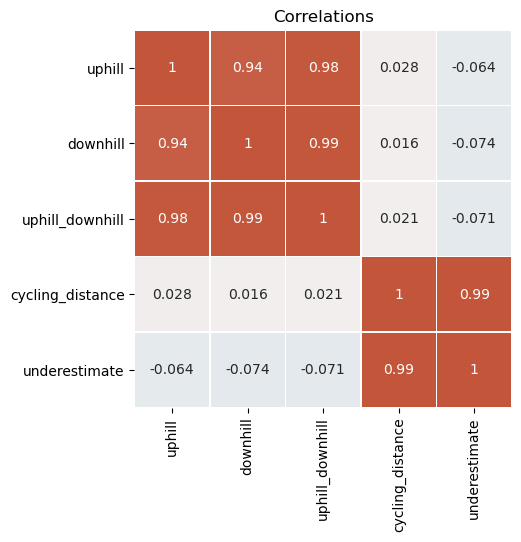

In [32]:
plot_heatmap("Correlations", error_anaylsis)

As can be seen from the graph above, there is not a strong correlation between the length of the uphill and downhill slopes and the distance underestimated

## Discuss the merits of this error estimation
From the distance calculated by the API above minus the distance calculated by gpx, the value in "underestimate" is all positive, which shows that there is a possibility that the distance is underestimated using length_3d. However, inaccurate distance calculations are not always a result of gpx underestimating distances, but can also be a result of using MapBox's API to calculate distances so that the actual distances are overestimated.

Maps may overestimate routes, for example when legal turns are considered invalid, or there may be legal routes that have not been updated in the database, thus making MapBox's calculation of the route more complex and thus making the distance longer. It is also possible that if a long section of the route is straight one day, but there is some deviation in the position of each of the points provided, this can also lead to an increase in the calculated distance, as the straight line is calculated as a route with some curvature.

Mountain bikes have a very large turning radius, so the design of the riding route can have more twists and turns than a typical road. Because there are so many dense turns, this can also lead to some turns being ignored when calculating the calculated distance, resulting in the true distance being underestimated.

When obtaining distances via MapBox, I was not asked for elevation, only the longitude and latitude of each point. MapBox's calculation of elevation may also be biased, possibly overestimating or underestimating the elevation, which also makes the distance calculated by MapBox inaccurate to the actual distance.